In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [184]:
def generate_dataset():
    d1 = 60
    d2 =60
    mu1 = (10,10)
    sigma1 = ((60,0),(0,60))
    mu2 = (50,40)
    sigma2 = ((70,0),(0,100))
    X1 = np.random.multivariate_normal(mu1,sigma1,d1)
    Y1 = np.ones(d1)
    X2 = np.random.multivariate_normal(mu2,sigma2,60)
    Y2 = np.empty(d2)
    Y2.fill(-1)
    return X1,X2,Y1,Y2  

In [185]:
X1,X2,Y1,Y2 = generate_dataset()
X = np.concatenate((X1,X2))
Y = np.concatenate((Y1,Y2))
print(X1.shape,Y1.shape,X2.shape,Y2.shape,X.shape)

(60, 2) (60,) (60, 2) (60,) (120, 2)


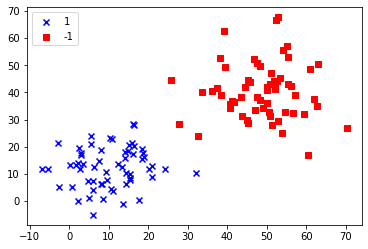

In [186]:
plt.scatter(X1[:,0],X1[:,1], c='b', marker='x', label='1')
plt.scatter(X2[:,0],X2[:,1], c='r', marker='s', label='-1')
plt.legend(loc='upper left')
plt.show()

In [187]:
def initialize_perceptron(dims):
    return np.zeros((dims+1))    

In [188]:
def update_perceptron(x,y,w):
    return w+y*x

In [189]:
def perceptron(X,Y):
    n,d = X.shape
    w = initialize_perceptron(d)
    b = 0.0
    count=0
    
    while(count<100):
        m=0
        permutation = np.random.permutation(n)
        xt = X[permutation]
        yt = Y[permutation]
        for i in range(n):
            xi = xt[i]
            yi = yt[i]
            xi = np.append(xi,1)
            if yi*np.dot(xi,w) <= 0:
                m+=1
                w = update_perceptron(xi,yi,w)
            xi = xi[:-1]
        if(m == 0):
            break
        count+=1
    b=w[-1]
    w = w[:-1]
    return w,b

In [190]:
w,b = perceptron(X,Y)

In [191]:
print(w,b)

[-9.1218539  -6.15017932] 385.0


In [192]:
assert (all(np.sign(Y*(X.dot(w)+b))==1.0))

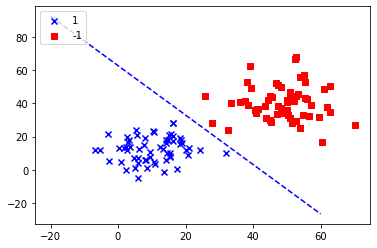

In [194]:
# draw decision boundary
fig = plt.figure()
ax = fig.add_subplot()
line = None
ax.scatter(X1[:,0],X1[:,1], c='b', marker='x', label='1')
ax.scatter(X2[:,0],X2[:,1], c='r', marker='s', label='-1')
plt.legend(loc = 'upper left')
# q=-b/(w**2).sum() *w
a = -w[0]/w[1]
xx = np.linspace(-20, 60)
yy = a * xx - (b) / w[1]
line, = ax.plot(xx,yy,'b--')
